### DAT2 FInal Project: Using Time Series forecasting on Pittsburgh Port Authority Bus ridership data.

Data used was the "Monthly Average Ridership by Route & Weekday" dataset obtained fron the WPRDC website located [here:](https://data.wprdc.org/dataset/port-authority-monthly-average-ridership-by-route/resource/12bb84ed-397e-435c-8d1b-8ce543108698)

## Cleaning the data
Next I chose a specific bus route to run a forecast on, choosing Route 016 as it is the bus line nearest my location.

Using Pandas I "dropped" all unnecessary columns from the CSV so that only Route, Day, Date, and number of riders. I then used pandas to rename the columns to a more appropriate title, grouped by route 016, and saved to a new CSV (updated_bus.csv) so I could have my original, unmodified data.

This new CSV contains only the dates, bus schedule by day of the week (Saturday, Sunday, and Weekday schedules) for the years 2017, 2018, and 2019.

I proceeded to slice this data into three separate dataframes for each bus schedule. Due to smaller amount of records I chose to run the forecast on the three separate schedules to see if there was a difference between weekend and weekday schedules.

## Second forecasting: Prophet

In [13]:
import pandas as pd
from fbprophet import Prophet
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error, mean_absolute_error
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
import numpy as np

In [3]:
df = pd.read_csv('updated_bus.csv', parse_dates=['Month'])

In [4]:
df_sat = df.loc[df['Day'] == "SAT."]
df_sun = df.loc[df['Day'] == "SUN."]
df_wd = df.loc[df['Day'] == "WEEKDAY"]

df_sat = df_sat.drop(columns=['Day'])
df_sun = df_sun.drop(columns=['Day'])
df_wd = df_wd.drop(columns=['Day'])

# data further "cleaned" by renaming the date and rider data to match the Prophet model
df_sat.columns = ['ds','y']
df_sun.columns = ['ds','y']
df_wd.columns = ['ds','y']

### Prophet forecast for PGH Port Authority Bus Route 16, Saturday Schedule

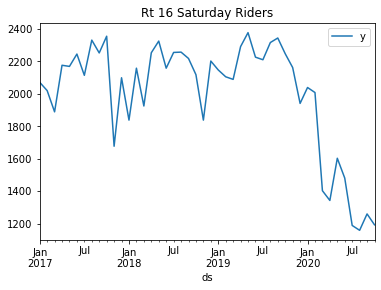

In [5]:
df_sat.plot(x="ds", y="y", title='Rt 16 Saturday Riders')
pyplot.show()

In [6]:
m = Prophet()
m.fit(df_sat) # this takes a few seconds
print("done")

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


done


In [7]:
fcst = m.predict(df_sat)
fcst.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-01-01,2393.930005,1827.981374,2491.709461,2393.930005,2393.930005,-238.344748,-238.344748,-238.344748,-238.344748,-238.344748,-238.344748,0.0,0.0,0.0,2155.585257
1,2017-02-01,2378.501232,1955.339934,2626.880164,2378.501232,2378.501232,-86.744923,-86.744923,-86.744923,-86.744923,-86.744923,-86.744923,0.0,0.0,0.0,2291.756309
2,2017-03-01,2364.565567,1768.452050,2452.691114,2364.565567,2364.565567,-265.342384,-265.342384,-265.342384,-265.342384,-265.342384,-265.342384,0.0,0.0,0.0,2099.223183
3,2017-04-01,2349.136794,1899.564294,2590.101972,2349.136794,2349.136794,-85.274058,-85.274058,-85.274058,-85.274058,-85.274058,-85.274058,0.0,0.0,0.0,2263.862736
4,2017-05-01,2334.205724,2046.332566,2762.012719,2334.205724,2334.205724,73.919383,73.919383,73.919383,73.919383,73.919383,73.919383,0.0,0.0,0.0,2408.125107


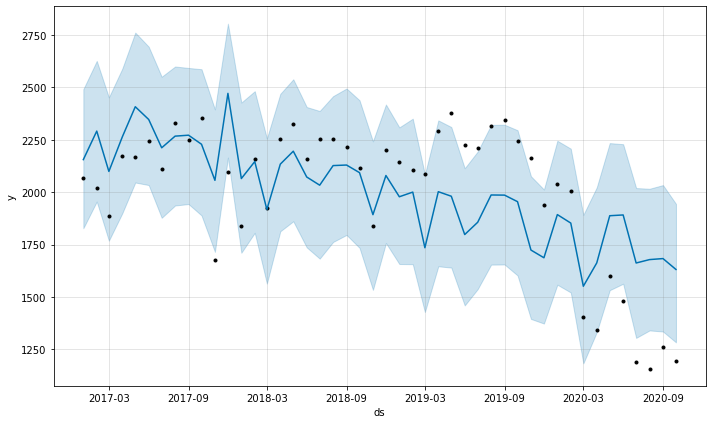

In [8]:
fig1 = m.plot(fcst)

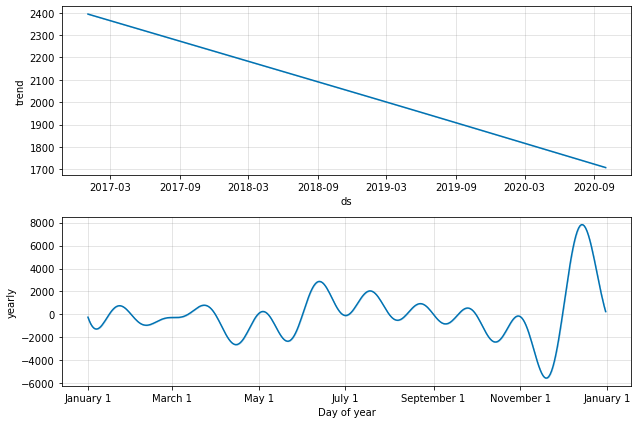

In [9]:
fig1 = m.plot_components(fcst)

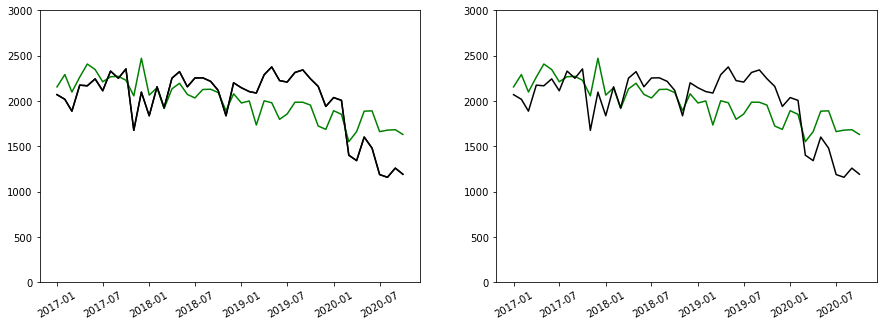

In [10]:
fig1 = pyplot.figure()
fig1.set_figheight(5)
fig1.set_figwidth(15)

ax0 = fig1.add_subplot(121)
ax0.plot_date(x=df_sat["ds"], y=df_sat["y"], fmt="k-")
ax0.plot_date(x=fcst["ds"], y=fcst["yhat"], fmt="g-")
ax0.plot_date(x=df_sat["ds"], y=df_sat["y"], fmt="k-")
pyplot.ylim(0,3000)
ax0.xaxis.set_tick_params(rotation=30, labelsize=10)

ax1 = fig1.add_subplot(122)
ax1.plot_date(x=fcst["ds"], y=fcst["yhat"], fmt="g-")
ax1.plot_date(x=df_sat["ds"], y=df_sat["y"], fmt="k-")
pyplot.ylim(0,3000)
ax1.xaxis.set_tick_params(rotation=30, labelsize=10)

pyplot.show()

## Evaluate the forecast using MSE, MAE, and RMSE

In [14]:
MSE = mean_squared_error(y_true=df_sat['y'], y_pred=fcst['yhat'])
print(MSE)

71106.80323097619
266.65858926908055


In [66]:
MAE = mean_absolute_error(y_true=df_sat['y'], y_pred=fcst['yhat'])
print(MAE)

644.3886604122334


In [18]:
rmse = np.sqrt(MSE)
print('Test RMSE: %.3f' % rmse)

Test RMSE: 266.659


### Prophet forecast for PGH Port Authority Bus Route 16, Sunday Schedule

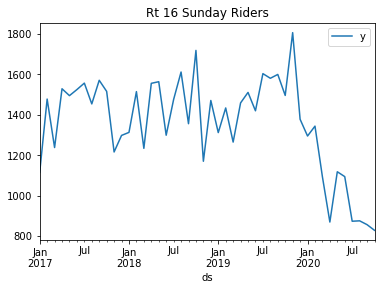

In [19]:
df_sun.plot(x="ds", y="y", title='Rt 16 Sunday Riders')
pyplot.show()

In [20]:
m = Prophet()
m.fit(df_sun) # this takes a few seconds
print("done")

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


done


In [21]:
fcst = m.predict(df_sun)
fcst.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-01-01,1516.496169,1049.953123,1444.442976,1516.496169,1516.496169,-260.680024,-260.680024,-260.680024,-260.680024,-260.680024,-260.680024,0.0,0.0,0.0,1255.816145
1,2017-02-01,1512.607713,1372.371905,1750.418639,1512.607713,1512.607713,49.287897,49.287897,49.287897,49.287897,49.287897,49.287897,0.0,0.0,0.0,1561.895611
2,2017-03-01,1509.095560,1143.193408,1533.580700,1509.095560,1509.095560,-171.375433,-171.375433,-171.375433,-171.375433,-171.375433,-171.375433,0.0,0.0,0.0,1337.720127
3,2017-04-01,1505.207104,1238.632100,1620.673787,1505.207104,1505.207104,-77.747780,-77.747780,-77.747780,-77.747780,-77.747780,-77.747780,0.0,0.0,0.0,1427.459324
4,2017-05-01,1501.444082,1336.149357,1743.132505,1501.444082,1501.444082,39.550321,39.550321,39.550321,39.550321,39.550321,39.550321,0.0,0.0,0.0,1540.994404


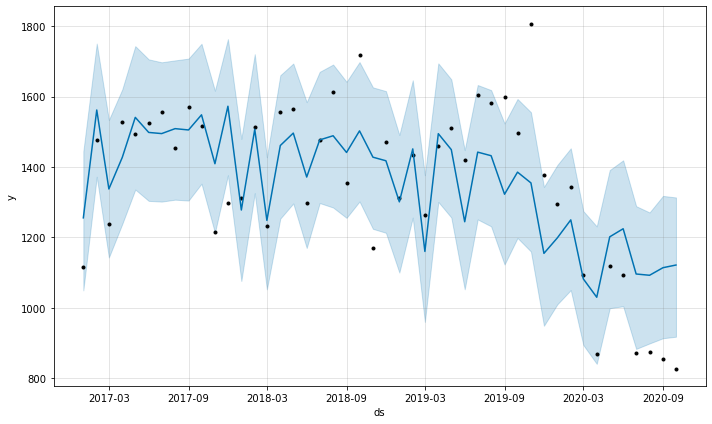

In [22]:
fig1 = m.plot(fcst)

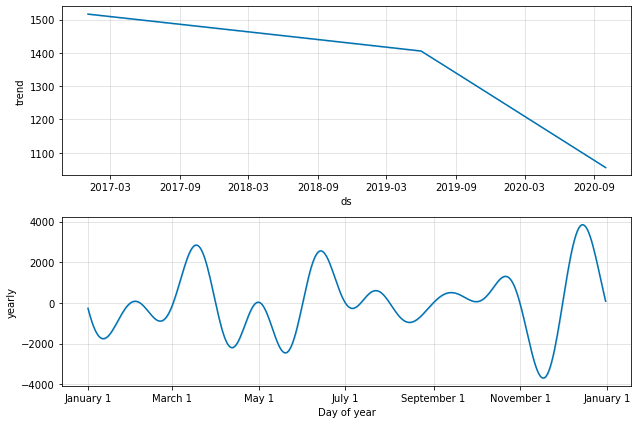

In [23]:
fig1 = m.plot_components(fcst)

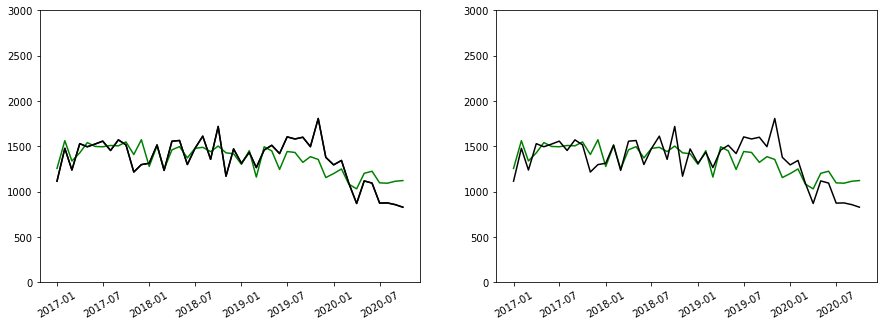

In [24]:
fig1 = pyplot.figure()
fig1.set_figheight(5)
fig1.set_figwidth(15)

ax0 = fig1.add_subplot(121)
ax0.plot_date(x=df_sun["ds"], y=df_sun["y"], fmt="k-")
ax0.plot_date(x=fcst["ds"], y=fcst["yhat"], fmt="g-")
ax0.plot_date(x=df_sun["ds"], y=df_sun["y"], fmt="k-")
pyplot.ylim(0,3000)
ax0.xaxis.set_tick_params(rotation=30, labelsize=10)

ax1 = fig1.add_subplot(122)
ax1.plot_date(x=fcst["ds"], y=fcst["yhat"], fmt="g-")
ax1.plot_date(x=df_sun["ds"], y=df_sun["y"], fmt="k-")
pyplot.ylim(0,3000)
ax1.xaxis.set_tick_params(rotation=30, labelsize=10)

pyplot.show()

## Evaluate the forecast using MSE, MAE, and RMSE

In [25]:
MSE = mean_squared_error(y_true=df_sun['y'], y_pred=fcst['yhat'])
print(MSE)

23725.885224111724


In [26]:
MAE = mean_absolute_error(y_true=df_sun['y'], y_pred=fcst['yhat'])
print(MAE)

120.87098222213864


In [27]:
rmse = np.sqrt(MSE)
print('Test RMSE: %.3f' % rmse)

Test RMSE: 154.032


### Prophet forecast for PGH Port Authority Bus Route 16, Weekday Schedule

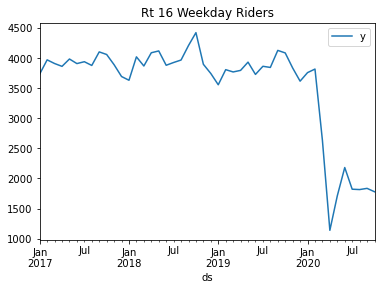

In [28]:
df_wd.plot(x="ds", y="y", title='Rt 16 Weekday Riders')
pyplot.show()

In [29]:
m = Prophet()
m.fit(df_wd) # this takes a few seconds
print("done")

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


done


In [30]:
fcst = m.predict(df_wd)
fcst.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-01-01,4588.665668,3342.740655,4743.532242,4588.665668,4588.665668,-530.374460,-530.374460,-530.374460,-530.374460,-530.374460,-530.374460,0.0,0.0,0.0,4058.291208
1,2017-02-01,4547.034694,3864.888917,5233.288515,4547.034694,4547.034694,-17.085682,-17.085682,-17.085682,-17.085682,-17.085682,-17.085682,0.0,0.0,0.0,4529.949012
2,2017-03-01,4509.432524,3664.134336,5100.520123,4509.432524,4509.432524,-129.228968,-129.228968,-129.228968,-129.228968,-129.228968,-129.228968,0.0,0.0,0.0,4380.203556
3,2017-04-01,4467.801550,3149.790902,4529.680189,4467.801550,4467.801550,-624.633735,-624.633735,-624.633735,-624.633735,-624.633735,-624.633735,0.0,0.0,0.0,3843.167815
4,2017-05-01,4427.513511,3471.749113,4865.140319,4427.513511,4427.513511,-266.448087,-266.448087,-266.448087,-266.448087,-266.448087,-266.448087,0.0,0.0,0.0,4161.065424


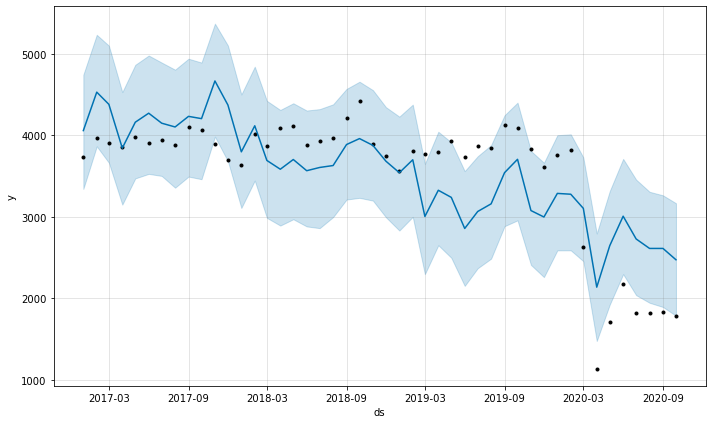

In [31]:
fig1 = m.plot(fcst)

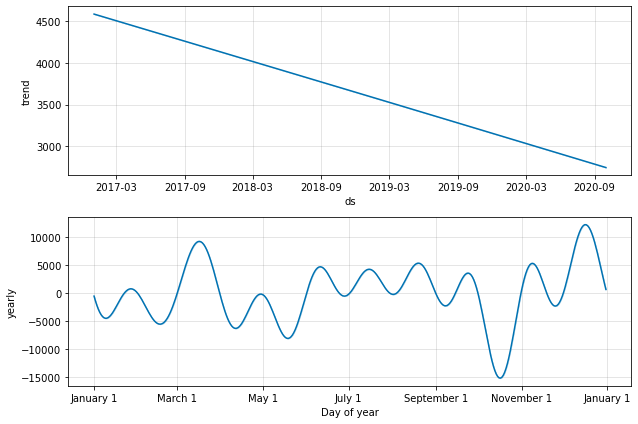

In [32]:
fig1 = m.plot_components(fcst)

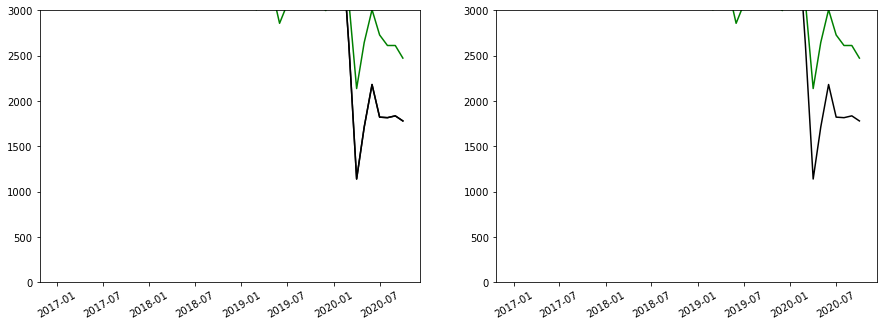

In [33]:
fig1 = pyplot.figure()
fig1.set_figheight(5)
fig1.set_figwidth(15)

ax0 = fig1.add_subplot(121)
ax0.plot_date(x=df_wd["ds"], y=df_wd["y"], fmt="k-")
ax0.plot_date(x=fcst["ds"], y=fcst["yhat"], fmt="g-")
ax0.plot_date(x=df_wd["ds"], y=df_wd["y"], fmt="k-")
pyplot.ylim(0,3000)
ax0.xaxis.set_tick_params(rotation=30, labelsize=10)

ax1 = fig1.add_subplot(122)
ax1.plot_date(x=fcst["ds"], y=fcst["yhat"], fmt="g-")
ax1.plot_date(x=df_wd["ds"], y=df_wd["y"], fmt="k-")
pyplot.ylim(0,3000)
ax1.xaxis.set_tick_params(rotation=30, labelsize=10)

pyplot.show()

## Evaluate the forecast using MSE, MAE, and RMSE

In [34]:
MSE = mean_squared_error(y_true=df_wd['y'], y_pred=fcst['yhat'])
print(MSE)

295033.18385201535


In [35]:
MAE = mean_absolute_error(y_true=df_wd['y'], y_pred=fcst['yhat'])
print(MAE)

466.06668608719275


In [36]:
rmse = np.sqrt(MSE)
print('Test RMSE: %.3f' % rmse)

Test RMSE: 543.170
